In [119]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import glob
import PIL
import random

random.seed(48)

In [120]:
dicom_data = pd.read_csv('../data/raw/CBIS-DDSM/csv/dicom_info.csv')
image_dir = '../data/raw/'

In [121]:
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [122]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [123]:
#put the image path before the image name

cropped_images = cropped_images.apply(lambda x: image_dir + x)
cropped_images.head()

0     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
3     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
6     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
7     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
10    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
Name: image_path, dtype: object

In [124]:
cropped_images[0:10]

0     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
3     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
6     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
7     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
10    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
13    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
19    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
21    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
26    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
28    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
Name: image_path, dtype: object

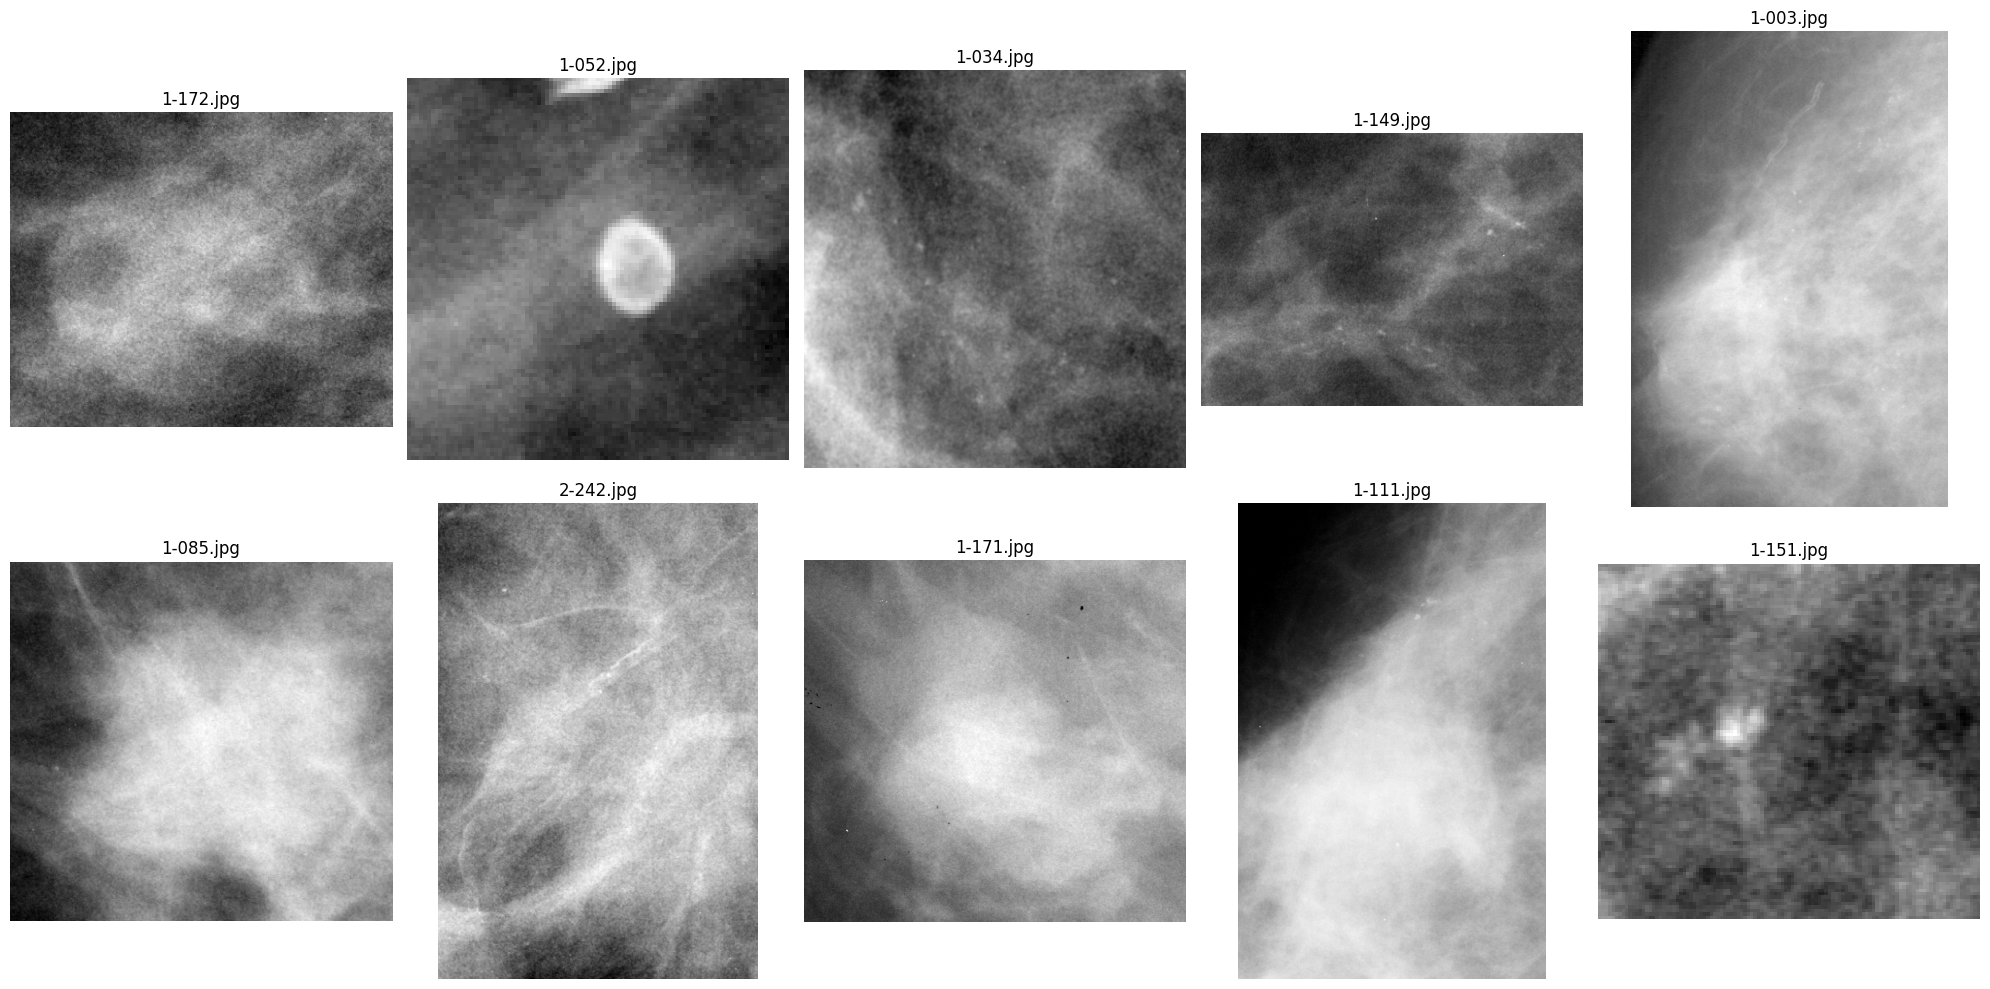

In [125]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()
for i, file in enumerate(cropped_images[0:10]):
    img = imread(file)
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(file.split('/')[-1], fontsize=12)
plt.tight_layout()

plt.show()
    


In [126]:
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [127]:
full_mammogram_images = full_mammogram_images.apply(lambda x: '../data/raw/' + x)
full_mammogram_images.head()

1     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
2     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
11    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
12    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
15    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
Name: image_path, dtype: object

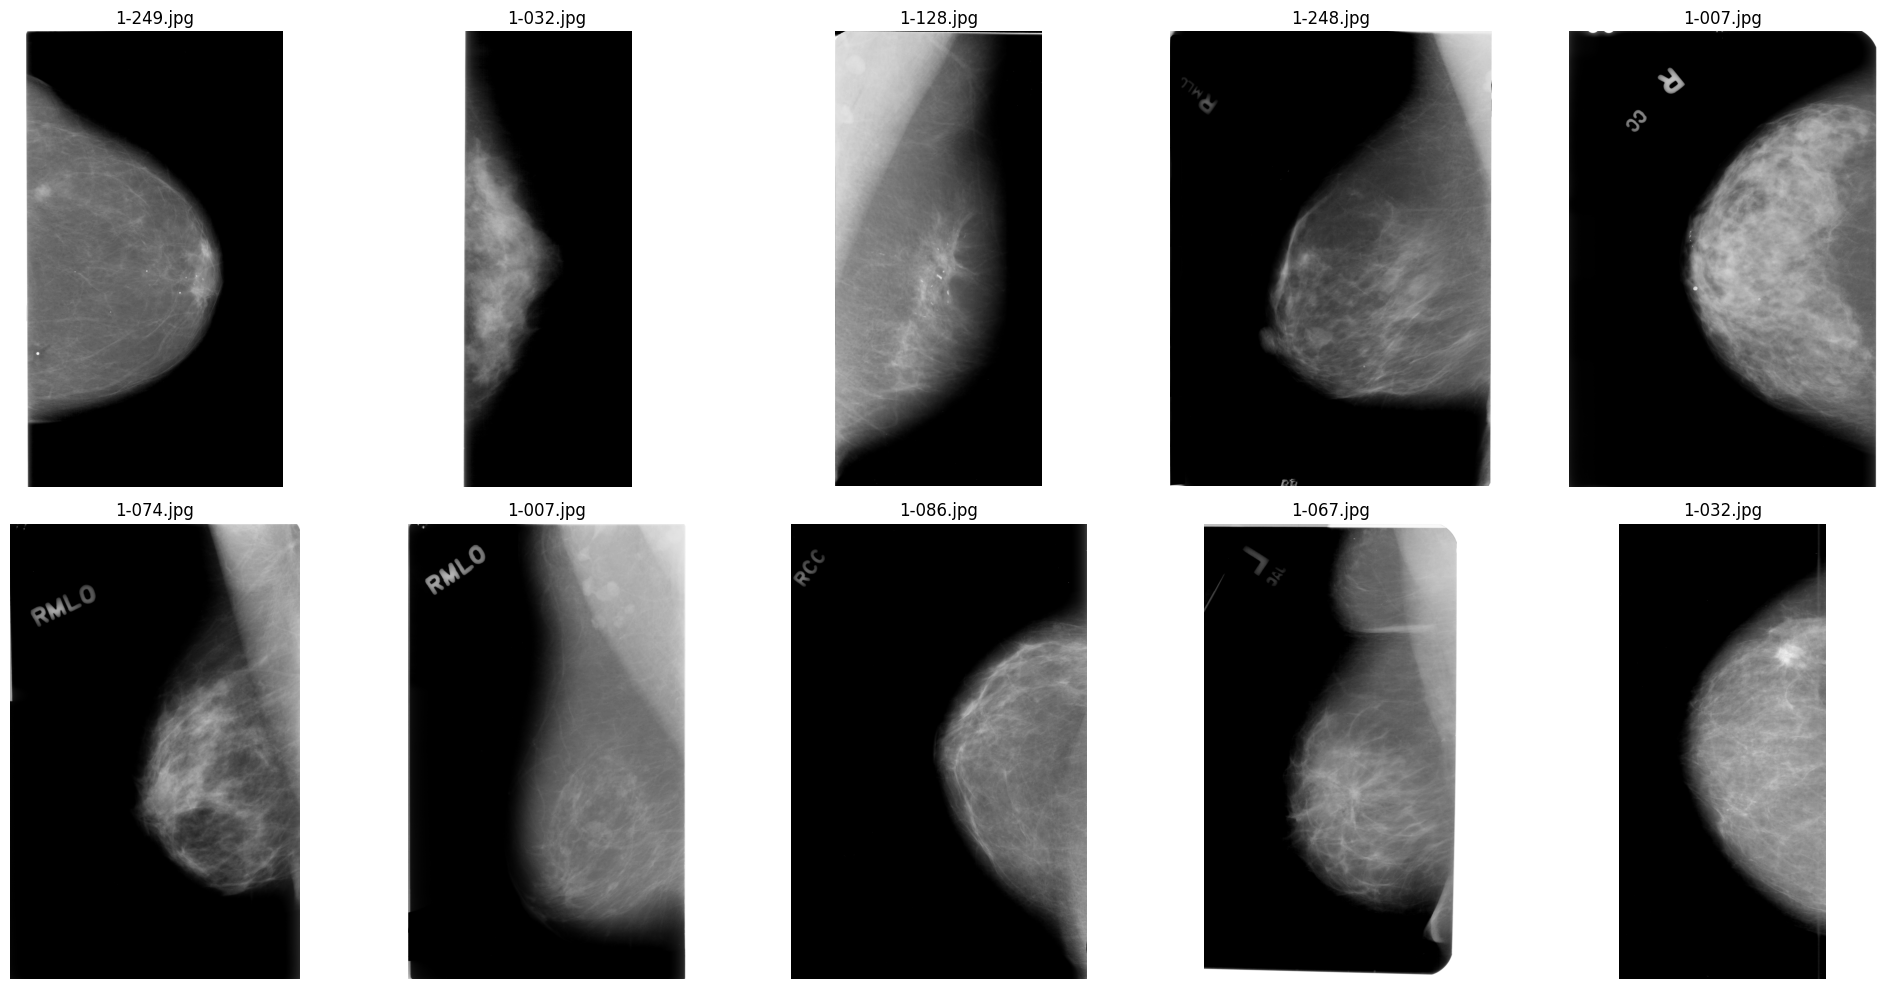

In [128]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()
for i, file in enumerate(full_mammogram_images[0:10]):
    img = imread(file)
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(file.split('/')[-1], fontsize=12)
plt.tight_layout()

plt.show()

In [129]:
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [130]:
ROI_mask_images = ROI_mask_images.apply(lambda x: '../data/raw/' + x)
ROI_mask_images.head()

5     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
8     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
9     ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
14    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
20    ../data/raw/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.10...
Name: image_path, dtype: object

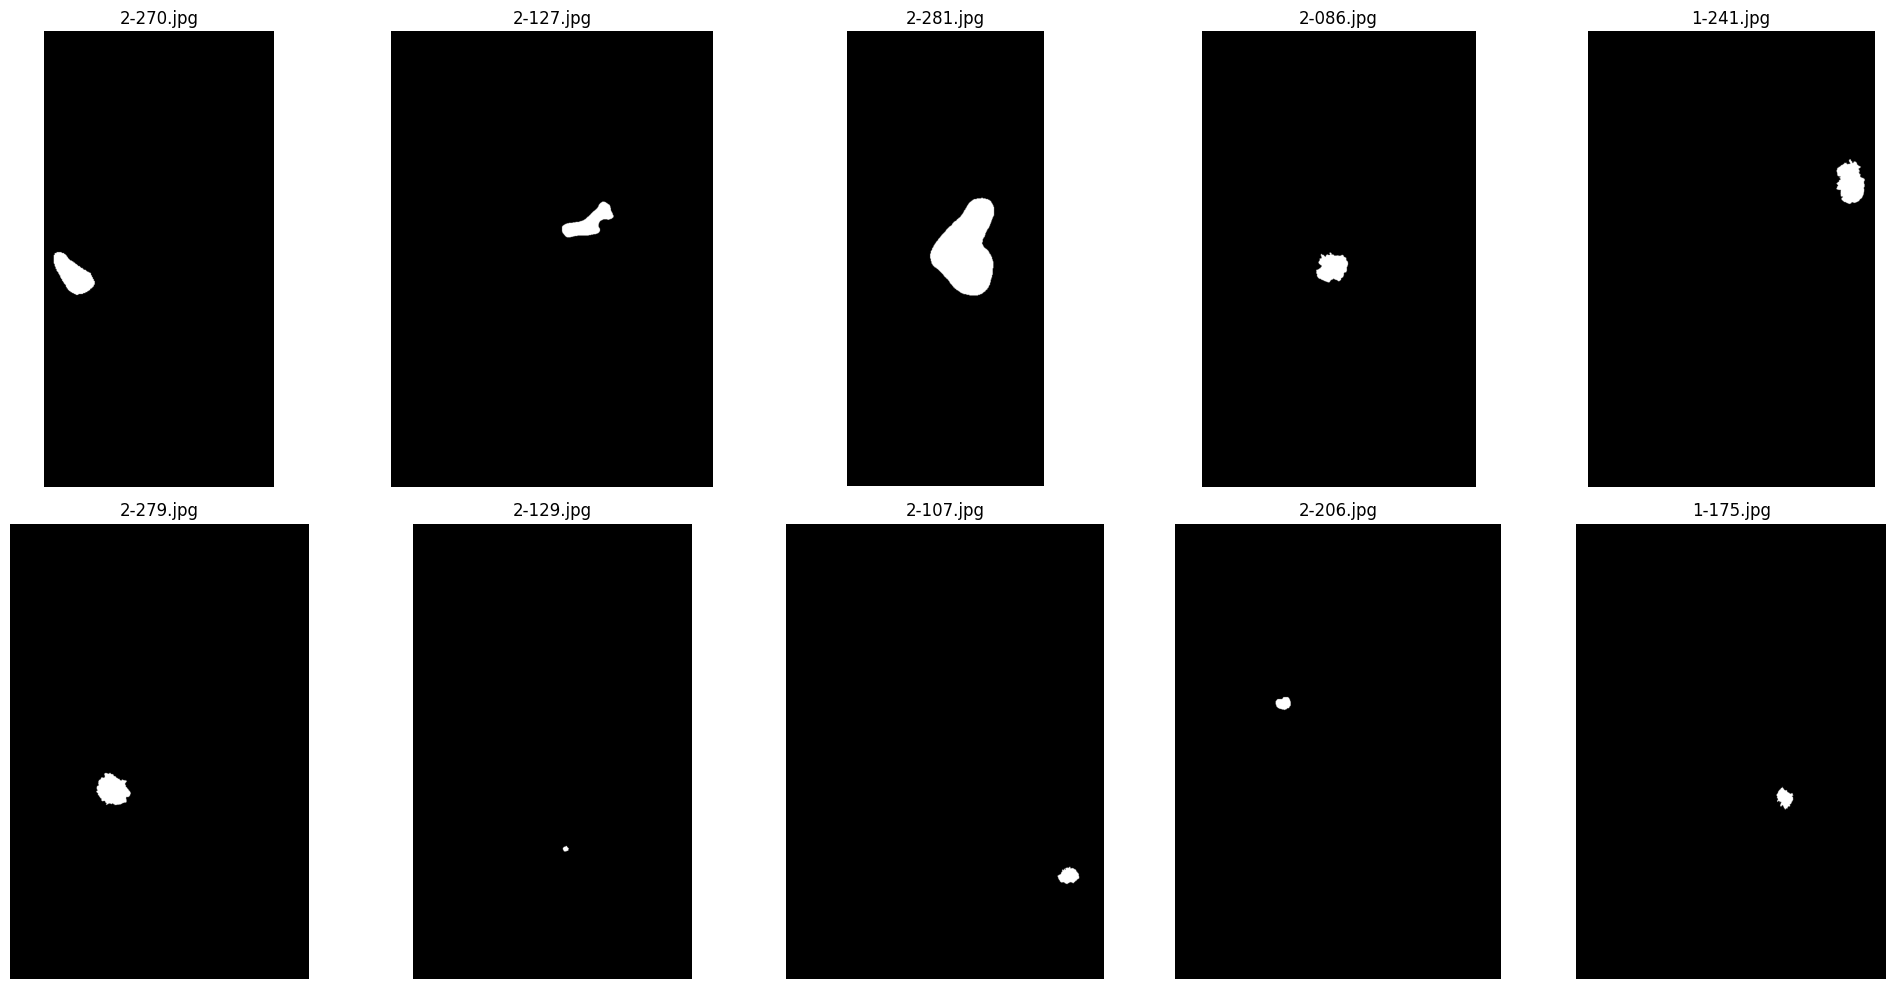

In [131]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()
for i, file in enumerate(ROI_mask_images[0:10]):
    img = imread(file)
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(file.split('/')[-1], fontsize=12)
plt.tight_layout()

plt.show()

In [132]:
calc_case_df = pd.read_csv('../data/raw/CBIS-DDSM/csv/calc_case_description_train_set.csv')
calc_case_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [133]:
mass_case_df = pd.read_csv('../data/raw/CBIS-DDSM/csv/mass_case_description_train_set.csv')
mass_case_df.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


# Data cleaning

In [134]:
dicom_cleaned_data = dicom_data.copy()
dicom_cleaned_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [135]:
dicom_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [136]:
dicom_cleaned_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows',
                                                'StudyDate','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)
dicom_cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [137]:
dicom_cleaned_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SOPClassUID                                      0
SOPInstanceUID                                   0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufactu

In [138]:
#get null SeriesDescription
null_series_desc=dicom_cleaned_data[dicom_cleaned_data.SeriesDescription.isna()]["image_path"]
null_series_desc.head()


4     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
27    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.281604...
73    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.189733...
76    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.316322...
85    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.397101...
Name: image_path, dtype: object

In [139]:
null_series_desc = null_series_desc.apply(lambda x: image_dir + x)


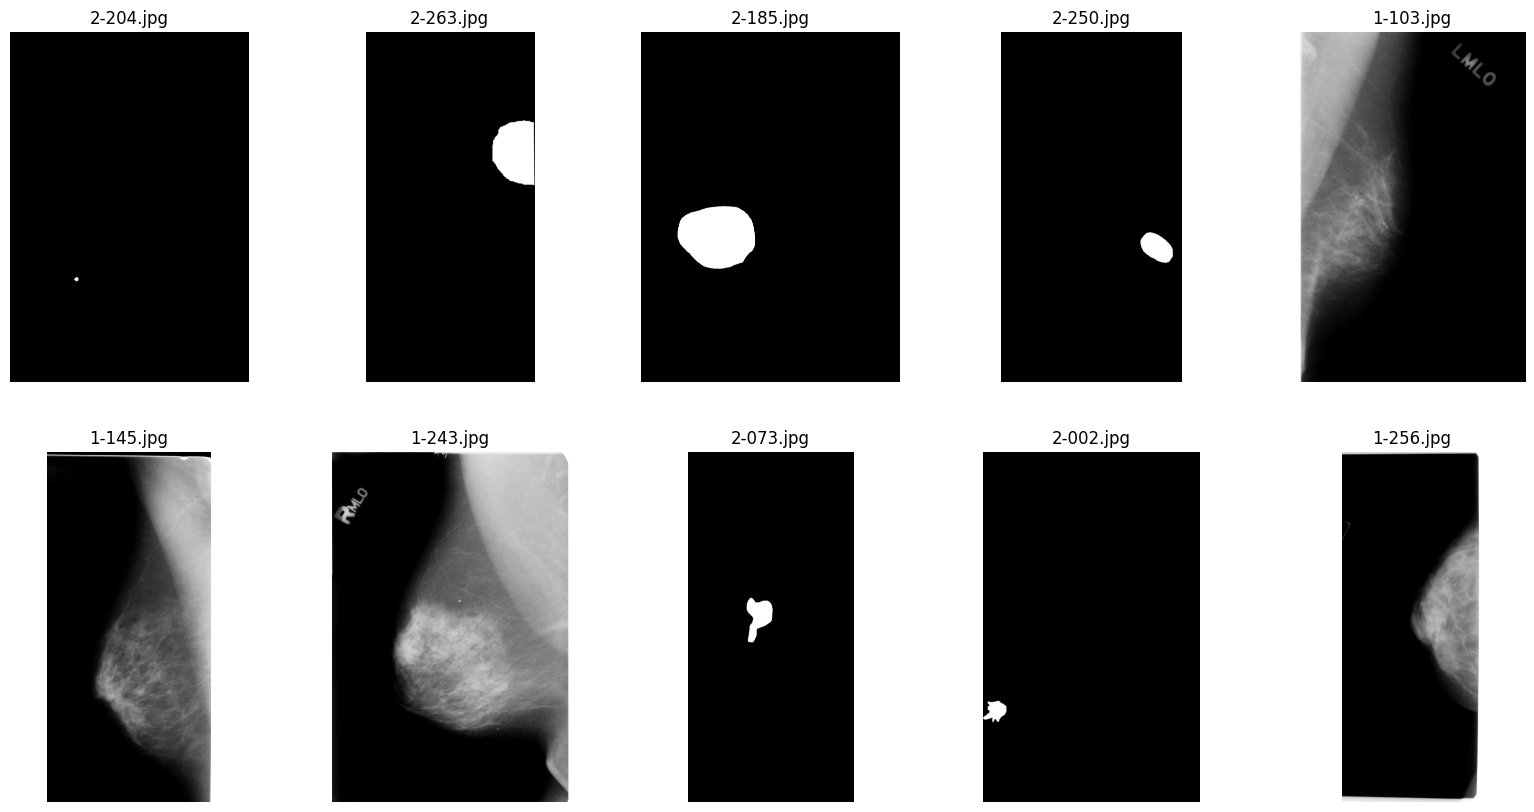

In [140]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))
ax = ax.ravel()
for i, file in enumerate(null_series_desc[0:10]):
    img = imread(file)
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(file.split('/')[-1], fontsize=12)

The pattern seems to be in the name so lets rename in this way:

starting number->1 : full mammogram images

->2: ROI mask images

In [141]:
#apply custom function only to null values in SeriesDescription

def get_image_type(image_path):
    name = image_path.split('/')[-1]
    #check first number in the name
    if name[0] == '1':
        return 'full mammogram images'
    elif name[0] == '2':
        return 'ROI mask images'
    else:
        pass
    
    
dicom_cleaned_data.loc[dicom_cleaned_data.SeriesDescription.isna(), 'SeriesDescription'] = dicom_cleaned_data.loc[dicom_cleaned_data.SeriesDescription.isna(), 'image_path'].apply(get_image_type)

In [142]:
dicom_cleaned_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SOPClassUID                                      0
SOPInstanceUID                                   0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufactu

In [143]:
#check unique values in SeriesDescription
dicom_cleaned_data.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', 'ROI mask images'],
      dtype=object)

In [144]:
#drop laterality column
dicom_cleaned_data.drop('Laterality', axis=1, inplace=True)
dicom_cleaned_data.head()

,file_path,image_path,BitsAllocated,BitsStored,BodyPartExamined,ConversionType,HighBit,LargestImagePixelValue,Modality,PatientID,...,SOPClassUID,SOPInstanceUID,SamplesPerPixel,SecondaryCaptureDeviceManufacturer,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SmallestImagePixelValue,SpecificCharacterSet,StudyID,StudyInstanceUID
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,16,16,BREAST,WSD,15,65535,MG,Mass-Training_P_01265_RIGHT_MLO_1,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.426380754911844882201...,1,MathWorks,MATLAB,cropped images,23078,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,16,16,BREAST,WSD,15,65535,MG,Mass-Training_P_01754_RIGHT_CC,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.235715018911442345533...,1,MathWorks,MATLAB,full mammogram images,0,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,16,16,BREAST,WSD,15,65535,MG,Calc-Training_P_00232_RIGHT_CC,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.212917405611495375422...,1,MathWorks,MATLAB,full mammogram images,0,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,16,16,BREAST,WSD,15,65535,MG,Calc-Test_P_00562_LEFT_CC_2,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.405776661412249467913...,1,MathWorks,MATLAB,cropped images,32298,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,8,8,Left Breast,WSD,7,255,MG,P_00562_LEFT_CC_2.dcm,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.418434643810489919922...,1,MathWorks,MATLAB,ROI mask images,0,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...


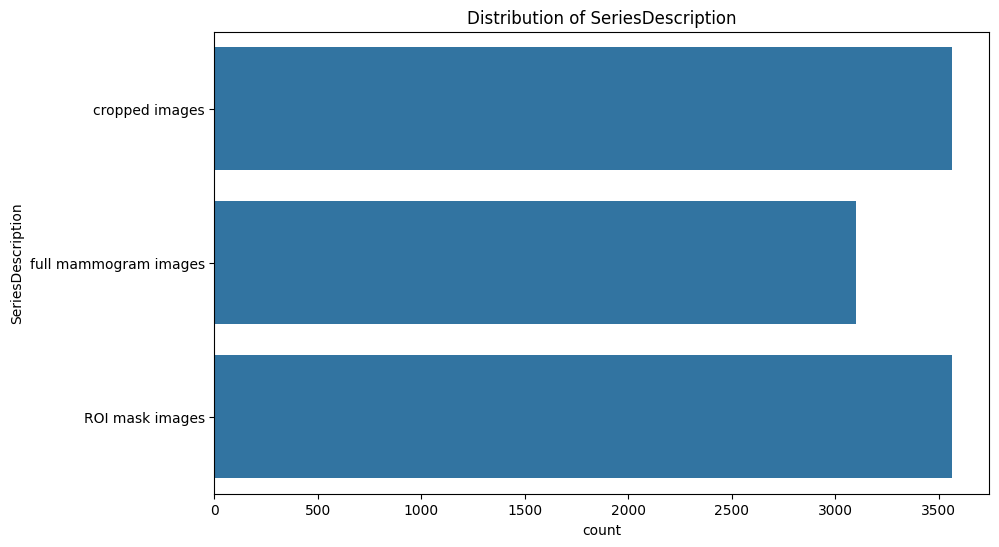

In [145]:
#histogram of SeriesDescription
plt.figure(figsize=(10, 6))
sns.countplot(dicom_cleaned_data.SeriesDescription)
plt.title('Distribution of SeriesDescription')
plt.show()

we want to keep only cropped images

In [146]:
#drop all rows that have SeriesDescription not as 'cropped images'
dicom_cleaned_data = dicom_cleaned_data[dicom_cleaned_data.SeriesDescription == 'cropped images']
dicom_cleaned_data.head()

,file_path,image_path,BitsAllocated,BitsStored,BodyPartExamined,ConversionType,HighBit,LargestImagePixelValue,Modality,PatientID,...,SOPClassUID,SOPInstanceUID,SamplesPerPixel,SecondaryCaptureDeviceManufacturer,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SmallestImagePixelValue,SpecificCharacterSet,StudyID,StudyInstanceUID
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,16,16,BREAST,WSD,15,65535,MG,Mass-Training_P_01265_RIGHT_MLO_1,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.426380754911844882201...,1,MathWorks,MATLAB,cropped images,23078,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,16,16,BREAST,WSD,15,65535,MG,Calc-Test_P_00562_LEFT_CC_2,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.405776661412249467913...,1,MathWorks,MATLAB,cropped images,32298,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...
6,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...,16,16,BREAST,WSD,15,65535,MG,Calc-Training_P_00181_RIGHT_CC_1,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.398771175312365272736...,1,MathWorks,MATLAB,cropped images,44323,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.157384031212566921514...
7,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...,16,16,BREAST,WSD,15,65535,MG,Calc-Training_P_01015_LEFT_CC_1,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.131386567811700111319...,1,MathWorks,MATLAB,cropped images,24057,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.250103550412831547020...
10,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...,16,16,BREAST,WSD,15,65535,MG,Calc-Training_P_01497_LEFT_CC_1,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.529049226133609743281...,1,MathWorks,MATLAB,cropped images,0,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.407544576612957992910...


In [147]:
calc_case_df['image file path'][0].split('/')[-2]

'1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548'

In [148]:
calc_case_df['image file path'][0].split('/')[-3]

'1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157'

In [149]:
dicom_cleaned_data['image_path'][0].split('/')[-2]

'1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304'

In [150]:
#search corresponding image file path in calc_case_df
def get_image_path(image_path):
    image_folder = image_path.split('/')[-3]
    if image_folder in calc_case_df['image file path'].str.split('/').str[-2]:
        return calc_case_df['image file path']
    else:
        return None
    


dicom_cleaned_data['image_path'].apply(get_image_path).head()



0     None
3     None
6     None
7     None
10    None
Name: image_path, dtype: object

In [151]:
file_names = mass_case_df['image file path'].tolist()

In [170]:
#split the file names to get the folder name
folder_names = [file.split('/')[2] for file in file_names]
folder_names[0:5]

['1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515',
 '1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834',
 '1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540',
 '1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162',
 '1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890']

In [171]:
#reinitialize the index
dicom_cleaned_data.reset_index(drop=True, inplace=True)
dicom_cleaned_data.head()

,file_path,image_path,BitsAllocated,BitsStored,BodyPartExamined,ConversionType,HighBit,LargestImagePixelValue,Modality,PatientID,...,SOPClassUID,SOPInstanceUID,SamplesPerPixel,SecondaryCaptureDeviceManufacturer,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SmallestImagePixelValue,SpecificCharacterSet,StudyID,StudyInstanceUID
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,16,16,BREAST,WSD,15,65535,MG,Mass-Training_P_01265_RIGHT_MLO_1,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.426380754911844882201...,1,MathWorks,MATLAB,cropped images,23078,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,16,16,BREAST,WSD,15,65535,MG,Calc-Test_P_00562_LEFT_CC_2,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.405776661412249467913...,1,MathWorks,MATLAB,cropped images,32298,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...,16,16,BREAST,WSD,15,65535,MG,Calc-Training_P_00181_RIGHT_CC_1,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.398771175312365272736...,1,MathWorks,MATLAB,cropped images,44323,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.157384031212566921514...
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...,16,16,BREAST,WSD,15,65535,MG,Calc-Training_P_01015_LEFT_CC_1,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.131386567811700111319...,1,MathWorks,MATLAB,cropped images,24057,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.250103550412831547020...
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...,16,16,BREAST,WSD,15,65535,MG,Calc-Training_P_01497_LEFT_CC_1,...,1.2.840.10008.5.1.4.1.1.7,1.3.6.1.4.1.9590.100.1.2.529049226133609743281...,1,MathWorks,MATLAB,cropped images,0,ISO_IR 100,DDSM,1.3.6.1.4.1.9590.100.1.2.407544576612957992910...


In [172]:

for i in range(len(dicom_cleaned_data)):
    if dicom_cleaned_data['StudyInstanceUID'][i] in folder_names:
        print(dicom_cleaned_data['image_path'][i])
    else:
        pass

In [169]:
dicom_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3567 entries, 0 to 3566
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    3567 non-null   object
 1   image_path                                   3567 non-null   object
 2   BitsAllocated                                3567 non-null   int64 
 3   BitsStored                                   3567 non-null   int64 
 4   BodyPartExamined                             3567 non-null   object
 5   ConversionType                               3567 non-null   object
 6   HighBit                                      3567 non-null   int64 
 7   LargestImagePixelValue                       3567 non-null   int64 
 8   Modality                                     3567 non-null   object
 9   PatientID                                    3567 non-null   object
 10  PatientName 

In [163]:
dicom_cleaned_data['StudyInstanceUID']  


0       1.3.6.1.4.1.9590.100.1.2.271867287611061855725...
1       1.3.6.1.4.1.9590.100.1.2.335006093711888937440...
2       1.3.6.1.4.1.9590.100.1.2.157384031212566921514...
3       1.3.6.1.4.1.9590.100.1.2.250103550412831547020...
4       1.3.6.1.4.1.9590.100.1.2.407544576612957992910...
                              ...                        
3562    1.3.6.1.4.1.9590.100.1.2.163213653512436697630...
3563    1.3.6.1.4.1.9590.100.1.2.110463352511827335323...
3564    1.3.6.1.4.1.9590.100.1.2.166079124139196773281...
3565    1.3.6.1.4.1.9590.100.1.2.310901637111684385906...
3566    1.3.6.1.4.1.9590.100.1.2.426769868613284096628...
Name: StudyInstanceUID, Length: 3567, dtype: object

In [165]:
dicom_cleaned_data['image_path']

KeyError: ('image_path', 'StudyInstanceUID')

# trying to download a balanced dataset to minimize data download

In [176]:
calc_case_test_df = pd.read_csv('../data/raw/CBIS-DDSM/csv/calc_case_description_test_set.csv')
calc_case_test_df.info()
calc_case_train_df = pd.read_csv('../data/raw/CBIS-DDSM/csv/calc_case_description_train_set.csv')
calc_case_train_df.info()
#unify the two dataframes into one
calc_case_df = pd.concat([calc_case_train_df, calc_case_test_df], axis=0)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               326 non-null    object
 1   breast density           326 non-null    int64 
 2   left or right breast     326 non-null    object
 3   image view               326 non-null    object
 4   abnormality id           326 non-null    int64 
 5   abnormality type         326 non-null    object
 6   calc type                322 non-null    object
 7   calc distribution        263 non-null    object
 8   assessment               326 non-null    int64 
 9   pathology                326 non-null    object
 10  subtlety                 326 non-null    int64 
 11  image file path          326 non-null    object
 12  cropped image file path  326 non-null    object
 13  ROI mask file path       326 non-null    object
dtypes: int64(4), object(10)
memory usage: 35.8

In [175]:
calc_case_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1872 entries, 0 to 325
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1872 non-null   object
 1   breast density           1872 non-null   int64 
 2   left or right breast     1872 non-null   object
 3   image view               1872 non-null   object
 4   abnormality id           1872 non-null   int64 
 5   abnormality type         1872 non-null   object
 6   calc type                1848 non-null   object
 7   calc distribution        1433 non-null   object
 8   assessment               1872 non-null   int64 
 9   pathology                1872 non-null   object
 10  subtlety                 1872 non-null   int64 
 11  image file path          1872 non-null   object
 12  cropped image file path  1872 non-null   object
 13  ROI mask file path       1872 non-null   object
dtypes: int64(4), object(10)
memory usage: 219.4+ K

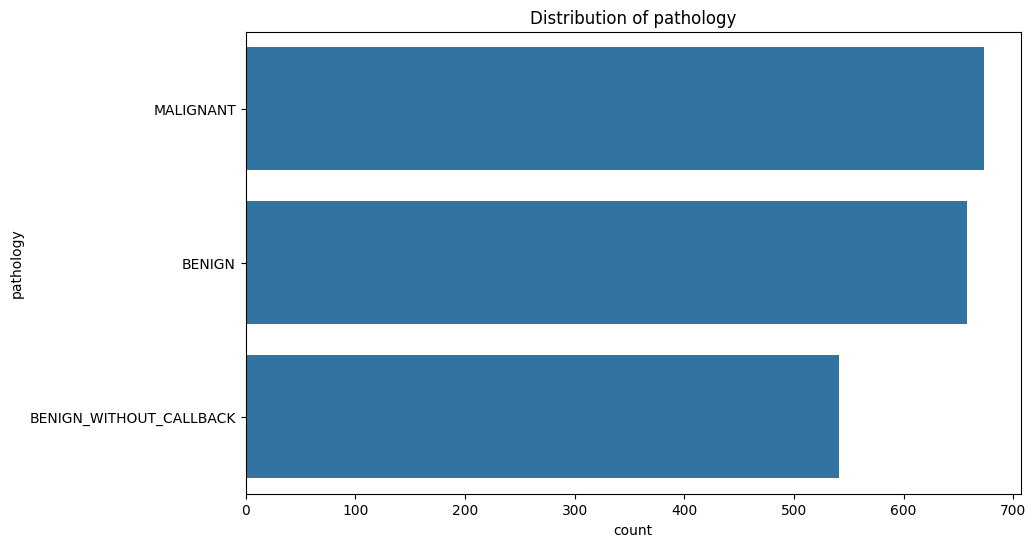

In [177]:
#histogram of pathology
plt.figure(figsize=(10, 6))
sns.countplot(calc_case_df.pathology)
plt.title('Distribution of pathology')
plt.show()


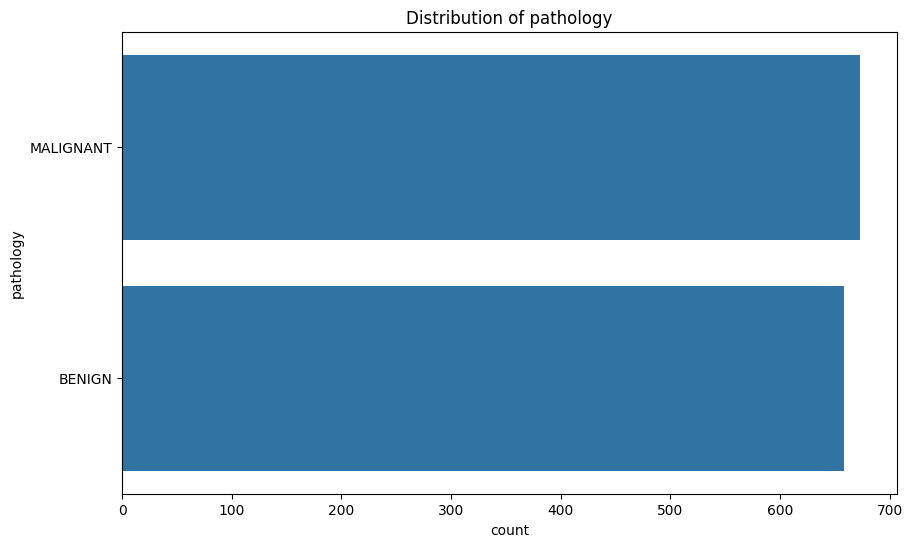

In [178]:
#drop all benign without callback rows
calc_case_df = calc_case_df[calc_case_df.pathology != 'BENIGN_WITHOUT_CALLBACK']
plt.figure(figsize=(10, 6))
sns.countplot(calc_case_df.pathology)
plt.title('Distribution of pathology')
plt.show()

seems balanced

note: without callback means that the cancer is compleatly benign

In [179]:
calc_case_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
22,P_00011,3,LEFT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,4,BENIGN,1,Calc-Training_P_00011_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00011_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00011_LEFT_CC_1/1.3.6.1.4.1.95...


In [187]:
subject_id = calc_case_df['image file path'].tolist()
subject_id = [file.split('/')[0] for file in subject_id]
subject_id[0:500]

['Calc-Training_P_00005_RIGHT_CC',
 'Calc-Training_P_00005_RIGHT_MLO',
 'Calc-Training_P_00007_LEFT_CC',
 'Calc-Training_P_00007_LEFT_MLO',
 'Calc-Training_P_00011_LEFT_CC',
 'Calc-Training_P_00011_LEFT_MLO',
 'Calc-Training_P_00012_LEFT_CC',
 'Calc-Training_P_00012_LEFT_MLO',
 'Calc-Training_P_00013_RIGHT_MLO',
 'Calc-Training_P_00014_LEFT_CC',
 'Calc-Training_P_00014_LEFT_MLO',
 'Calc-Training_P_00016_LEFT_CC',
 'Calc-Training_P_00016_LEFT_MLO',
 'Calc-Training_P_00019_RIGHT_MLO',
 'Calc-Training_P_00019_RIGHT_CC',
 'Calc-Training_P_00020_LEFT_CC',
 'Calc-Training_P_00020_LEFT_MLO',
 'Calc-Training_P_00022_LEFT_CC',
 'Calc-Training_P_00022_LEFT_MLO',
 'Calc-Training_P_00024_LEFT_CC',
 'Calc-Training_P_00024_LEFT_MLO',
 'Calc-Training_P_00028_LEFT_MLO',
 'Calc-Training_P_00029_LEFT_CC',
 'Calc-Training_P_00029_LEFT_MLO',
 'Calc-Training_P_00031_LEFT_CC',
 'Calc-Training_P_00034_RIGHT_CC',
 'Calc-Training_P_00034_RIGHT_MLO',
 'Calc-Training_P_00043_LEFT_MLO',
 'Calc-Training_P_00047_LE

In [184]:
#check how many start with 'Calc-'
len([i for i in subject_id if i.startswith('Calc-')]),
len([i for i in subject_id if not(i.startswith('Calc-'))])


0

In [181]:
#when it doesnt start with "Calc-" append at the beginning of the string "Calc-"
subject_id = ['Calc-' + id if id[0] != 'C' else id for id in subject_id]


Calc-Training_P_00005_RIGHT_CC, Calc-Training_P_00005_RIGHT_MLO, Calc-Training_P_00007_LEFT_CC, Calc-Training_P_00007_LEFT_MLO, Calc-Training_P_00011_LEFT_CC, Calc-Training_P_00011_LEFT_MLO, Calc-Training_P_00012_LEFT_CC, Calc-Training_P_00012_LEFT_MLO, Calc-Training_P_00013_RIGHT_MLO, Calc-Training_P_00014_LEFT_CC, Calc-Training_P_00014_LEFT_MLO, Calc-Training_P_00016_LEFT_CC, Calc-Training_P_00016_LEFT_MLO, Calc-Training_P_00019_RIGHT_MLO, Calc-Training_P_00019_RIGHT_CC, Calc-Training_P_00020_LEFT_CC, Calc-Training_P_00020_LEFT_MLO, Calc-Training_P_00022_LEFT_CC, Calc-Training_P_00022_LEFT_MLO, Calc-Training_P_00024_LEFT_CC, Calc-Training_P_00024_LEFT_MLO, Calc-Training_P_00028_LEFT_MLO, Calc-Training_P_00029_LEFT_CC, Calc-Training_P_00029_LEFT_MLO, Calc-Training_P_00031_LEFT_CC, Calc-Training_P_00034_RIGHT_CC, Calc-Training_P_00034_RIGHT_MLO, Calc-Training_P_00043_LEFT_MLO, Calc-Training_P_00047_LEFT_CC, Calc-Training_P_00047_LEFT_CC, Calc-Training_P_00047_LEFT_CC, Calc-Training_P_0

In [188]:
new_metadata = pd.read_csv('../data/raw/k_CBIS-DDSM/metadata(with_jpg_img).csv')
new_metadata.head()

,Series UID,Subject ID,Study UID,Series Description,Modality,SOP Class Name,SOP Class UID,Number of Images,jpg_folder_path
0,1.3.6.1.4.1.9590.100.1.2.419081637812053404913...,Calc-Test_P_00038_LEFT_CC_1,1.3.6.1.4.1.9590.100.1.2.161465562211359959230...,ROI mask images,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,jpg_img/Calc_Test_P_00038_LEFT_CC_1-1.3.6.1.4....
1,1.3.6.1.4.1.9590.100.1.2.188613955710170417803...,Calc-Test_P_00038_LEFT_MLO_1,1.3.6.1.4.1.9590.100.1.2.291121996131431385353...,ROI mask images,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,jpg_img/Calc_Test_P_00038_LEFT_MLO_1-1.3.6.1.4...
2,1.3.6.1.4.1.9590.100.1.2.263861248711313923336...,Calc-Test_P_00038_RIGHT_CC,1.3.6.1.4.1.9590.100.1.2.177706148911820252341...,full mammogram images,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,1,jpg_img/Calc_Test_P_00038_RIGHT_CC-1.3.6.1.4.1...
3,1.3.6.1.4.1.9590.100.1.2.244876997513875090239...,Calc-Test_P_00038_RIGHT_CC_1,1.3.6.1.4.1.9590.100.1.2.200764632211227648028...,ROI mask images,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,jpg_img/Calc_Test_P_00038_RIGHT_CC_1-1.3.6.1.4...
4,1.3.6.1.4.1.9590.100.1.2.360550081712464813321...,Calc-Test_P_00038_RIGHT_CC_2,1.3.6.1.4.1.9590.100.1.2.248538452013626298441...,ROI mask images,MG,Secondary Capture Image Storage,1.2.840.10008.5.1.4.1.1.7,2,jpg_img/Calc_Test_P_00038_RIGHT_CC_2-1.3.6.1.4...


In [191]:
new_metadata["jpg_folder_path"][0]

'jpg_img/Calc_Test_P_00038_LEFT_CC_1-1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942-1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515'

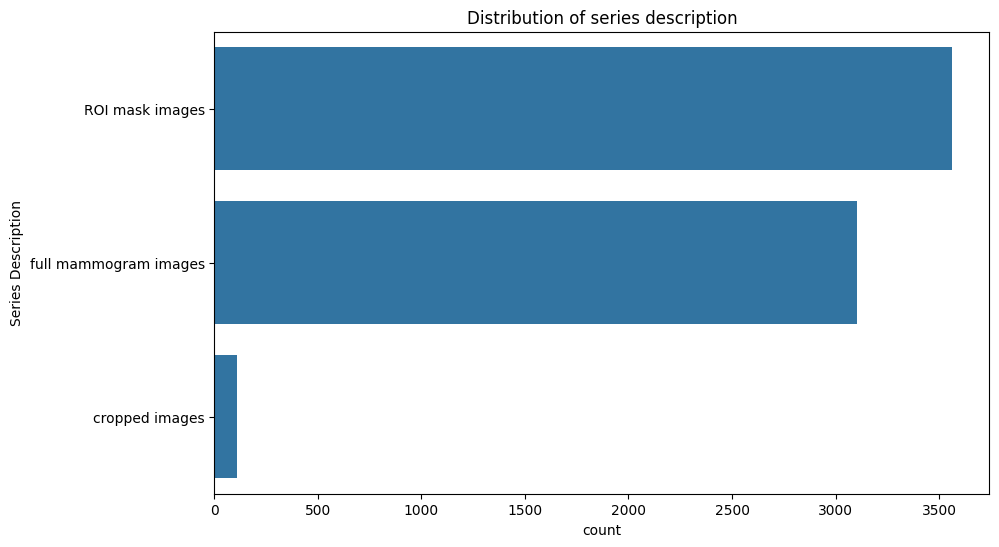

In [190]:
#hist  series description
plt.figure(figsize=(10, 6))
sns.countplot(new_metadata["Series Description"])
plt.title('Distribution of series description')
plt.show()
